In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Colab command to navigate to the folder holding the homework,
# CHANGE FOR YOUR SPECIFIC FOLDER LOCATION IN GOOGLE DRIVE
# Note: if there are spaces in the path, you need to preceed them with a backslash '\'
%cd /content/drive/My\ Drive/Colab\ Notebooks/Results

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Results


In [ ]:
#@title
import numpy as np, pandas as pd, matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
#                                                   mark_inset)


pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True

In [ ]:
num = str("6285") + str("_96") + str("sph")
lx = 21 #*2
ly = 21 #*2

X_INNER = 20 #*2
Y_INNER = 20 #*2
  
dx = 1.0/3.0
dy = dx

Nx = int(lx/dx)
Ny = int(ly/dy)
 
print(Nx)
print(Ny)

print(Nx*Ny)

63
63
3969


In [ ]:
#@title
## PHA ELEC
dfe = pd.read_csv("el"+num+".dat",
                 sep="\s+", 
                 skiprows=0, 
                 names=['rx','ry','el','1','2','3'])
print(dfe)
##PHA BLOCK
df = pd.read_csv("ph"+num+".dat",
                 sep="\s+", 
                 skiprows=0, 
                 names=['rx','ry','phA', 'ph1', 'ph2', 'ph3', 'phB'])
                 
print(df)

         rx      ry        el         1         2         3
0      0.00   0.000  0.003998  0.058043  0.057580  0.000123
1      0.00   0.333  0.003998  0.058043  0.057580  0.000123
2      0.00   0.666  0.004439  0.058069  0.057555  0.000136
3      0.00   0.999  0.005374  0.058123  0.057501  0.000162
4      0.00   1.332  0.006915  0.058213  0.057413  0.000206
...     ...     ...       ...       ...       ...       ...
7771  26.64  30.300 -0.000000  0.057811  0.057811  0.000000
7772  26.64  30.640 -0.000000  0.057811  0.057811  0.000000
7773  26.64  30.970 -0.000000  0.057811  0.057811  0.000000
7774  26.64  31.300 -0.000000  0.057811  0.057811  0.000000
7775  26.64  31.640 -0.000000  0.057811  0.057811  0.000000

[7776 rows x 6 columns]
         rx      ry       phA       ph1       ph2       ph3       phB
0      0.00   0.000  0.000670  0.000117  0.000437  0.000116  0.999329
1      0.00   0.333  0.000670  0.000117  0.000437  0.000116  0.999329
2      0.00   0.666  0.000736  0.000129  0.00

In [ ]:
#@title
rows = range(0, Nx)
cols = range(0, Ny)

el = pd.DataFrame(data=None, index=rows, columns=cols, dtype=None, copy=False)
el = el.fillna(0) # with 0s rather than NaNs
elr = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
elr = elr.fillna(0) # with 0s rather than NaNs
elz = pd.DataFrame(data=None, index=cols, columns=range(2), dtype=None, copy=False)
elz = elz.fillna(0) # with 0s rather than NaNs

for i in rows:
  for j in cols:
    k = i*Ny + j
    el.iloc[i, j] = dfe.iloc[k, 2]

i = 0
for j in cols:
  k = i*Ny + j
  elz.iloc[j, 0] = dfe.iloc[k, 1]
  elz.iloc[j, 1] = dfe.iloc[k, 2]

j = 0
for i in rows:
  k = i*Ny + j
  elr.iloc[i, 0] = dfe.iloc[k, 0]
  elr.iloc[i, 1] = dfe.iloc[k, 2]

In [ ]:
#@title
rows = range(0, Nx)
cols = range(0, Ny)

phA = pd.DataFrame(data=None, index=rows, columns=cols, dtype=None, copy=False)
phA = phA.fillna(0) # with 0s rather than NaNs
phAr = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
phAr = phAr.fillna(0) # with 0s rather than NaNs
phAz = pd.DataFrame(data=None, index=cols, columns=range(2), dtype=None, copy=False)
phAz = phAz.fillna(0) # with 0s rather than NaNs
ph1 = pd.DataFrame(data=None, index=rows, columns=cols, dtype=None, copy=False)
ph1 = ph1.fillna(0) # with 0s rather than NaNs
ph1r = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
ph1r = ph1r.fillna(0) # with 0s rather than NaNs
ph1z = pd.DataFrame(data=None, index=cols, columns=range(2), dtype=None, copy=False)
ph1z = ph1z.fillna(0) # with 0s rather than NaNs
ph2 = pd.DataFrame(data=None, index=rows, columns=cols, dtype=None, copy=False)
ph2 = ph2.fillna(0) # with 0s rather than NaNs
ph2r = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
ph2r = ph2r.fillna(0) # with 0s rather than NaNs
ph2z = pd.DataFrame(data=None, index=cols, columns=range(2), dtype=None, copy=False)
ph2z = ph2z.fillna(0) # with 0s rather than NaNs
ph3 = pd.DataFrame(data=None, index=rows, columns=cols, dtype=None, copy=False)
ph3 = ph3.fillna(0) # with 0s rather than NaNs
ph3r = pd.DataFrame(data=None, index=rows, columns=range(2), dtype=None, copy=False)
ph3r = ph3r.fillna(0) # with 0s rather than NaNs
ph3z = pd.DataFrame(data=None, index=cols, columns=range(2), dtype=None, copy=False)
ph3z = ph3z.fillna(0) # with 0s rather than NaNs

phB = pd.DataFrame(data=None, index=rows, columns=cols, dtype=None, copy=False)
phB = phB.fillna(0) # with 0s rather than NaNs

for i in range(Nx):
  for j in range(Ny):
    k = i*Ny + j

    phA.iloc[i, j] = df.iloc[k, 2]
    ph1.iloc[i, j] = df.iloc[k, 3]
    ph2.iloc[i, j] = df.iloc[k, 4]
    ph3.iloc[i, j] = df.iloc[k, 5]
    phB.iloc[i, j] = df.iloc[k, 6]

j = 0
for i in range(Nx):
  k = i*Ny+j
  phAr.iloc[i, 0] = df.iloc[k,0]
  phAr.iloc[i, 1] = df.iloc[k,2]
  ph1r.iloc[i, 0] = df.iloc[k,0]
  ph1r.iloc[i, 1] = df.iloc[k,3]
  ph2r.iloc[i, 0] = df.iloc[k,0]
  ph2r.iloc[i, 1] = df.iloc[k,4]
  ph3r.iloc[i, 0] = df.iloc[k,0]
  ph3r.iloc[i, 1] = df.iloc[k,5]

i = 0
for j in range(Ny):
  k = i*Ny+j
  phAz.iloc[j, 0] = df.iloc[k,1]
  phAz.iloc[j, 1] = df.iloc[k,2]
  ph1z.iloc[j, 0] = df.iloc[k,1]
  ph1z.iloc[j, 1] = df.iloc[k,3]
  ph2z.iloc[j, 0] = df.iloc[k,1]
  ph2z.iloc[j, 1] = df.iloc[k,4]
  ph3z.iloc[j, 0] = df.iloc[k,1]
  ph3z.iloc[j, 1] = df.iloc[k,5]

In [ ]:
#@title
def heatmap(data, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    

    # We want to show all ticks...
    #ax.set_xticks(np.arange(data.shape[1]))
    #ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    #ax.set_xticklabels(col_labels)
    #ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    #ax.tick_params(top=True, bottom=False,
                   #labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             #rotation_mode="anchor")

    # Turn spines off and create white grid.
    #ax.spines[:].set_visible(False)

    #ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    #ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    #ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

60 60


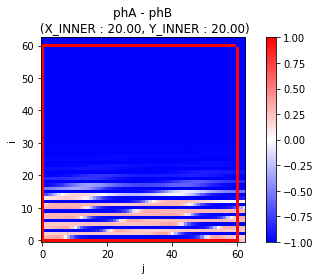

In [ ]:
#@title
dx = lx/Nx
dy = ly/Ny

Nx_b = round(X_INNER / dx)
Ny_b = round(Y_INNER / dy)

print(Nx_b, Ny_b)
ph_new = pd.DataFrame(data = None, index = rows, columns = cols, dtype = None, copy = False)
ph_new = ph_new.fillna(0)
ph_new = phA + phB.multiply(-1)

for i in range(0, Nx):
  for j in range(0, Ny):
    if (i == 0 and j < Ny_b) or (i == Nx_b and j < Ny_b): 
      ph_new.iloc[i, j] = 1
      #ph_new.iloc[i+1, j] = 1
    if (j == 0 and i < Nx_b) or (j == Ny_b and i < Nx_b): 
      ph_new.iloc[i, j] = 1
      #ph_new.iloc[i, j+1] = 1
#ph_new.iloc[Nx_b, Ny_b] = 1
#ph_new.iloc[Nx_b+1, Ny_b] = 1
#ph_new.iloc[Nx_b+1, Ny_b+1] = 1
#ph_new.iloc[Nx_b, Ny_b+1] = 1

fig, ax = plt.subplots()
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)
ax.set_title('phA - phB\n (X_INNER : {:.2f}, Y_INNER : {:.2f})'.format(X_INNER, Y_INNER))
ax.set_ylabel("i")
ax.set_xlabel("j")

im, cbar = heatmap(ph_new, ax = ax, cmap = 'bwr', vmin = -1.0, vmax = 1.0)

cbar.ax.axes.yaxis.set_visible(True)

fig.tight_layout()
plt.gca().invert_yaxis()
plt.show()


NameError: ignored

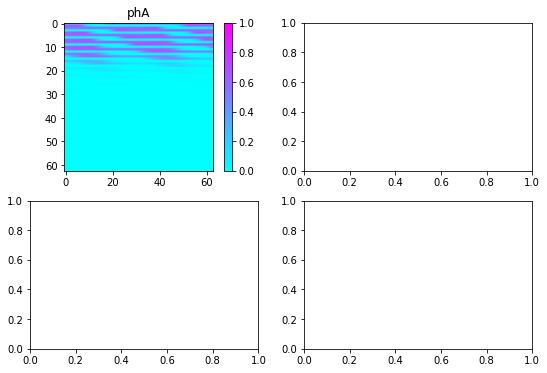

In [ ]:
#@title
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (9,6))
ax[0][0].set_title("phA")
im, cbar = heatmap(phA, ax=ax[0][0], cmap="cool", vmin = 0.0, vmax = 1.0)
ax00 = ax[0][0].inset_axes([0.55, 0.55, 0.40, 0.40])
ax00.plot(phAr.iloc[0:Nx_b,0],phAr.iloc[0:Nx_b,1], marker = '.')
ax00.set_xlim([0.0, phAr.iloc[Nx_b,0]])
ax00.set_ylim([0.0,1.0])
ax00.set_title("phi(r,0)")

ax[0][1].set_title("ph1")
im, cbar = heatmap(ph1, ax=ax[0][1], cmap="cool", vmin = 0.0, vmax = 1.0)
ax01 = ax[0][1].inset_axes([0.55, 0.55, 0.40, 0.40])
ax01.plot(ph1r.iloc[0:Nx_b,0],ph1r.iloc[0:Nx_b,1], marker = '.')
ax01.set_xlim([0.0, ph1r.iloc[Nx_b,0]])
ax01.set_ylim([0.0,1.0])
ax01.set_title("phi(r,0)")

ax[1][0].set_title("ph2")
im, cbar = heatmap(ph2, ax=ax[1][0], cmap="cool", vmin = 0.0, vmax = 1.0)
ax10 = ax[1][0].inset_axes([0.55, 0.55, 0.40, 0.40])
ax10.plot(ph2r.iloc[0:Nx_b,0],ph2r.iloc[0:Nx_b,1], marker = '.')
ax10.set_ylim([0.0,1.0])
ax10.set_xlim([0.0, ph2r.iloc[Nx_b,0]])
ax10.set_title("phi(r,0)")

ax[1][1].set_title("ph3")
im, cbar = heatmap(ph3, ax=ax[1][1], cmap="cool", vmin = 0.0, vmax = 1.0)
ax11 = ax[1][1].inset_axes([0.55, 0.55, 0.40, 0.40])
ax11.plot(ph3r.iloc[0:Nx_b,0],ph3r.iloc[0:Nx_b,1], marker = '.')
ax11.set_ylim([0.0,1.0])
ax11.set_xlim([0.0, ph3r.iloc[Nx_b,0]])
ax11.set_title("phi(r,0)")

for i in range(2):
  for j in range(2):
    ax[i][j].axes.xaxis.set_visible(True)
    ax[i][j].axes.yaxis.set_visible(True)
    ax[i][j].set_ylabel("i")
    ax[i][j].set_xlabel("j")
    ax[i][j].invert_yaxis()

cbar.ax.axes.yaxis.set_visible(True)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()


63 63


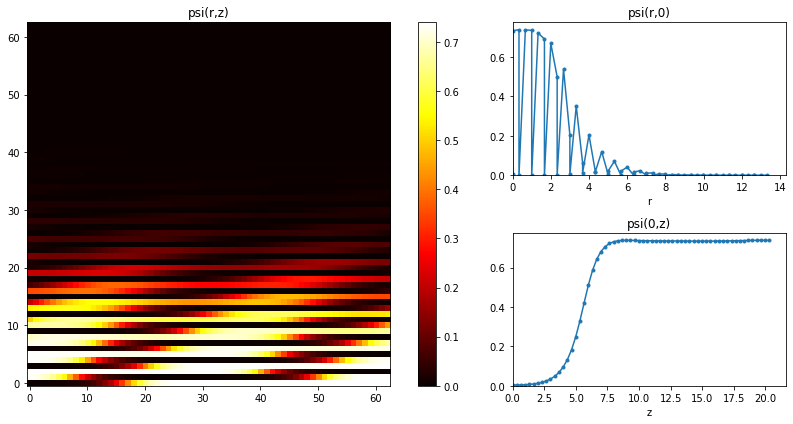

In [ ]:
#@title
fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot2grid(shape=(2,3), loc=(0,0), rowspan=2, colspan=2)
ax2 = plt.subplot2grid(shape=(2,3), loc=(0,2), rowspan=1, colspan=1)
ax3 = plt.subplot2grid(shape=(2,3), loc=(1,2), rowspan=1, colspan=1)

im, cbar = heatmap(el, ax=ax1, cmap="hot", vmin = 0.0, vmax = None)
cbar.ax.axes.yaxis.set_visible(True)
ax1.invert_yaxis()
ax1.set_title("psi(r,z)")
ax2.plot(elr.iloc[0:round(Nx-1),0],elr.iloc[0:Nx-1,1], marker = '.')
ax2.set_ylim([0.0,None])
ax2.set_xlim([0.0, elr.iloc[Nx-1,0]+1])
ax2.set_title("psi(r,0)")
ax2.set_xlabel("r")
ax3.plot(elz.iloc[0:round(Ny-1),0],elz.iloc[0:Ny-1,1], marker = '.')
ax3.set_ylim([0.0,None])
ax3.set_xlim([0.0, elz.iloc[Ny-1,0]+1])
ax3.set_title("psi(0,z)")
ax3.set_xlabel("z")

print(Nx, Ny)

fig.tight_layout()
plt.show()

In [ ]:
Norm = 0
T11 = 0
T33 = 0
rxdf = df.loc[:,"rx"]
rydf = df.loc[:,"ry"]
for i in range(Nx):
  for j in range(Ny):
    rx = rxdf.iloc[i*Ny+j]
    ry = rydf.iloc[i*Ny+j]
    Norm+=phA.iloc[i,j]*rx;
    T11+=phA.iloc[i, j]*rx*rx*rx;
    T33+=phA.iloc[i, j]*rx*ry*ry;

T11/=(2.0*Norm);
T33/=Norm;

Rg_sq=2.0*T11+T33;
Rg=np.sqrt(Rg_sq);
print(Rg)

15.379157878696946


In [ ]:
# #@title
# f, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows = 2, ncols = 2, figsize=(10,4))

# #############Parent
# df = pd.read_csv("W.dat",
#                  sep="\s+", 
#                  skiprows=0, 
#                  names=['w1','w2','w3', 'wb', 'eta', 'pot_elec'])
# lx = 11
# ly = 36
# Nx = int(lx/dx)
# Ny = int(ly/dy)
# rows = range(0, Nx)
# cols = range(0, Ny)

# w1 = pd.DataFrame(data=None, index=rows, columns=cols, dtype=None, copy=False)
# w1 = w1.fillna(0) # with 0s rather than NaNs
# for i in range(Nx):
#   for j in range(Ny):
#     k = i*Ny+j
#     w1.iloc[i,j] = df.iloc[k, 0]
# #print(w1)

# #fig, ax = plt.subplots()
# ax1.axes.xaxis.set_visible(True)
# ax1.axes.yaxis.set_visible(True)
# ax1.set_title('Original')
# ax1.set_ylabel("i")
# ax1.set_xlabel("j")

# im, cbar = heatmap(w1, ax = ax1, cmap = 'hot', vmin = 0.0, vmax = 1.0)

# cbar.ax.axes.yaxis.set_visible(True)

# ax1.invert_yaxis()
# #plt.show()

# ##########Converted (Z only)
# Nx = 21 #new vals
# Ny = 59 #new vals

# df = pd.read_csv("W_pn0_"+str(Nx)+"_"+str(Ny)+".dat",
#                  sep="\s+", 
#                  skiprows=0,  
#                  names=['w1','w2','w3', 'wb', 'eta', 'pot_elec'])


# rows = range(0, Nx)
# cols = range(0, Ny)

# w1 = pd.DataFrame(data=None, index=rows, columns=cols, dtype=None, copy=False)
# w1 = w1.fillna(0) # with 0s rather than NaNs
# for i in range(Nx):
#   for j in range(Ny):
#     k = i*Ny+j
#     w1.iloc[i,j] = df.iloc[k, 0]

# #fig, ax = plt.subplots()
# ax2.axes.xaxis.set_visible(True)
# ax2.axes.yaxis.set_visible(True)
# ax2.set_title('Z transform only')
# ax2.set_ylabel("i")
# ax2.set_xlabel("j")

# im, cbar = heatmap(w1, ax = ax2, cmap = 'hot', vmin = 0.0, vmax = 1.0)

# cbar.ax.axes.yaxis.set_visible(True)

# ax2.invert_yaxis()

# ##########Converted (R, Z)
# Nx = 19 #new vals
# Ny = 107 #new vals

# df = pd.read_csv("W_pn0_"+str(Nx)+"_"+str(Ny)+".dat",
#                  sep="\s+", 
#                  skiprows=0,  
#                  names=['w1','w2','w3', 'wb', 'eta', 'pot_elec'])

# rows = range(0, Nx)
# cols = range(0, Ny)

# w1 = pd.DataFrame(data=None, index=rows, columns=cols, dtype=None, copy=False)
# w1 = w1.fillna(0) # with 0s rather than NaNs
# for i in range(Nx):
#   for j in range(Ny):
#     k = i*Ny+j
#     w1.iloc[i,j] = df.iloc[k, 0]

# #fig, ax = plt.subplots()
# ax3.axes.xaxis.set_visible(True)
# ax3.axes.yaxis.set_visible(True)
# ax3.set_title('Full R, Z transform')
# ax3.set_ylabel("i")
# ax3.set_xlabel("j")

# im, cbar = heatmap(w1, ax = ax3, cmap = 'hot', vmin = 0.0, vmax = 1.0)

# cbar.ax.axes.yaxis.set_visible(True)

# ax3.invert_yaxis()
# #plt.show()


# ################Final
# df = pd.read_csv("W_pn0_31_87.dat", #W_pn.dat
#                  sep="\s+", 
#                  skiprows=0, 
#                  names=['w1','w2','w3', 'wb', 'eta', 'pot_elec'])
# lx = 31/3#9
# ly = 87/3#36
# Nx = int(lx/dx)
# Ny = int(ly/dy)
# rows = range(0, Nx)
# cols = range(0, Ny)

# w1 = pd.DataFrame(data=None, index=rows, columns=cols, dtype=None, copy=False)
# w1 = w1.fillna(0) # with 0s rather than NaNs
# for i in range(Nx):
#   for j in range(Ny):
#     k = i*Ny+j
#     w1.iloc[i,j] = df.iloc[k, 0]
# #print(w1)

# #fig, ax = plt.subplots()
# ax4.axes.xaxis.set_visible(True)
# ax4.axes.yaxis.set_visible(True)
# ax4.set_title('Final')
# ax4.set_ylabel("i")
# ax4.set_xlabel("j")

# im, cbar = heatmap(w1, ax = ax4, cmap = 'hot', vmin = 0.0, vmax = 1.0)

# cbar.ax.axes.yaxis.set_visible(True)

# f.tight_layout()
# plt.gca().invert_yaxis()
# plt.show()

